In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
import pydicom
import nibabel as nib

In [2]:
dataset_dir = '../../data/dataset'

train_meta = pd.read_csv(os.path.join(dataset_dir, 'train_series_meta.csv'))
train = pd.read_csv(os.path.join(dataset_dir, 'train.csv'))
image_level_label = pd.read_csv(os.path.join(dataset_dir, 'image_level_labels.csv'))

In [51]:
train_meta.groupby('patient_id')['series_id'].nunique().value_counts()

1    1583
2    1564
Name: series_id, dtype: int64

In [4]:
train_meta['incomplete_organ'].value_counts()

0    4398
1     313
Name: incomplete_organ, dtype: int64

In [5]:
train_meta['patient_id'].nunique()

3147

In [8]:
image_level_label['patient_id'].nunique()

246

In [9]:
train[(train['bowel_injury']==1) | (train['extravasation_injury']==1)]

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
5,10065,0,1,1,0,1,0,0,1,0,0,1,0,0,1
16,10217,1,0,0,1,1,0,0,0,1,0,0,0,1,1
22,10292,1,0,0,1,1,0,0,1,0,0,1,0,0,1
28,10494,1,0,0,1,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,820,0,1,0,1,1,0,0,1,0,0,1,0,0,1
3063,8263,1,0,0,1,0,1,0,0,0,1,1,0,0,1
3082,8684,0,1,1,0,1,0,0,1,0,0,1,0,0,1
3122,9528,1,0,0,1,1,0,0,1,0,0,1,0,0,1


In [10]:
image_level_label['injury_name'].unique()

array(['Active_Extravasation', 'Bowel'], dtype=object)

In [11]:
image_level_label.groupby('patient_id')['injury_name'].first().value_counts()

Active_Extravasation    183
Bowel                    63
Name: injury_name, dtype: int64

In [12]:
set([col.split('_')[0] for col in train.columns[1:-1]])

{'bowel', 'extravasation', 'kidney', 'liver', 'spleen'}

**train_meta**  
`incomplete_organ` - True if one or more organs wasn't fully covered by the scan. This label is only provided for the train set.

**image_level_label** : Identifies specific images that contain 'either bowel or extravasation injuries'. -> 246 patients  
`injury_name` - The type of injury visible in the frame.


In [13]:
train['any_injury'].value_counts()

0    2292
1     855
Name: any_injury, dtype: int64

In [14]:
train[train['patient_id'] == 26]

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
866,26,1,0,1,0,1,0,0,1,0,0,1,0,0,0


In [15]:
train_meta[train_meta['patient_id'] == 26]

,patient_id,series_id,aortic_hu,incomplete_organ
1293,26,18881,255.0,0
1294,26,41997,101.0,0


In [16]:
arr = pydicom.dcmread('../../data/dataset/train_images/26/18881/53.dcm').pixel_array.astype('float32')
arr -= arr.min()
arr /= arr.max()
arr *= 255.0
arr.min(), arr.max(), arr.shape

(0.0, 255.0, (512, 512))

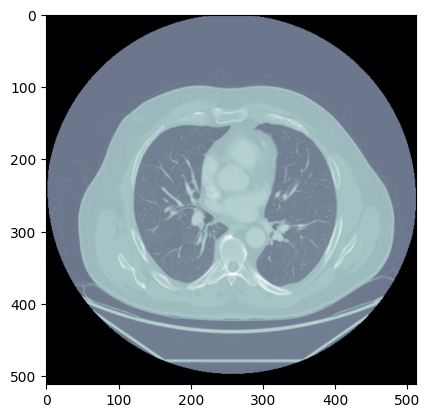

In [17]:
plt.imshow(arr, cmap='bone')

In [18]:
image_level_label = pd.read_csv('../../data/dataset/image_level_labels.csv')
image_level_label

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation
...,...,...,...,...
12024,9632,3750,155,Active_Extravasation
12025,9632,3750,156,Active_Extravasation
12026,9632,3750,157,Active_Extravasation
12027,9632,3750,158,Active_Extravasation


In [19]:
image_level_label['injury_name'].unique()

array(['Active_Extravasation', 'Bowel'], dtype=object)

In [20]:
image_level_label['injury_name'].value_counts()

Active_Extravasation    6370
Bowel                   5659
Name: injury_name, dtype: int64

In [21]:
image_level_label['patient_id'].nunique()

246

In [22]:
_id = 13925 # series_id
seg_sample = f'../../data/dataset/segmentations/{_id}.nii'
proxy_data = nib.load(seg_sample).get_fdata()
print(proxy_data.shape)

(512, 512, 730)


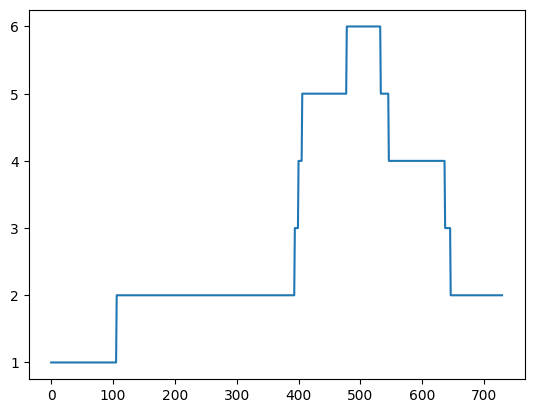

In [23]:
a = []
for p in np.arange(proxy_data.shape[2]):
    a.append(len(np.unique(proxy_data[:,:,p])))
# plt.plot(sorted(a))
plt.plot(a)

In [24]:
np.unique(proxy_data[:,:,500])

array([0., 1., 2., 3., 4., 5.])

In [25]:
def to_seg_df():
    seg_series_ids = sorted([int(p.split(".")[0]) for p in os.listdir('../../data/dataset/segmentations')])
    print(len(seg_series_ids))

    seg_df = train_meta[train_meta['series_id'].isin(seg_series_ids)].reset_index(drop=True)
    tmp = train[train['patient_id'].isin(seg_df['patient_id'].unique())]
    seg_df = pd.merge(tmp, seg_df, how='left', on='patient_id')

    p = "../../data"
    # seg_df.to_csv(os.path.join(p, f"seg_df.csv"), index=False)

# to_seg_df()

In [26]:
seg_df = pd.read_csv("../../data/seg_df.csv")
seg_df

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,aortic_hu,incomplete_organ
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,146.00,0
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,51033,454.75,0
2,10217,1,0,0,1,1,0,0,0,1,0,0,0,1,1,16066,208.00,0
3,10228,1,0,1,0,1,0,0,0,1,0,0,1,0,1,30522,145.00,0
4,10228,1,0,1,0,1,0,0,0,1,0,0,1,0,1,40471,291.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,65504,1,0,1,0,1,0,0,0,1,0,0,0,1,1,55928,144.00,0
202,7642,0,1,1,0,1,0,0,0,1,0,0,1,0,1,778,183.00,0
203,8848,1,0,1,0,1,0,0,0,1,0,0,1,0,1,41663,238.00,0
204,8848,1,0,1,0,1,0,0,0,1,0,0,1,0,1,7384,367.00,0


In [32]:
data_dir = '../../data'
png_path = os.path.join(data_dir, 'png_folder')
train_path = os.path.join(data_dir, 'dataset/train_images')

In [42]:
pid, sid = 10004, 21057
search_path = f"{train_path}/{pid}/{sid}"
# t_paths = sorted(glob.glob(os.path.join(search_path, '*')), key=lambda x: int(x.split('/')[-1].split(".")[0]))
t_paths = sorted(os.listdir(search_path), key=lambda x: int(x.split('.')[0]))
len(t_paths)

1022

In [45]:
p_paths = [f"{png_path}/{pid}_{sid}_{p.split('.')[0]}.png" for p in t_paths]
len(p_paths)

1022

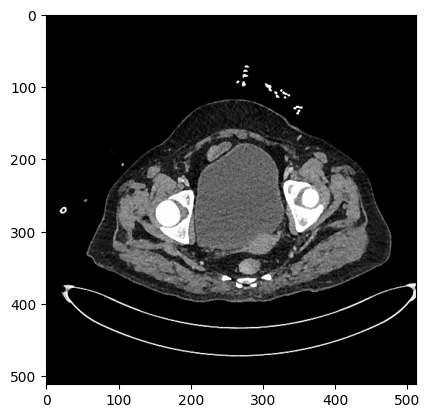

In [47]:
plt.imshow(cv2.imread(p_paths[0]))

In [ ]:
# 1500653

In [52]:
len(os.listdir('../../data/dataset/segmentations'))
# series_id

206

In [53]:
p = "../../data/dataset/segmentations/137.nii"
mask_org = nib.load(p).get_fdata()
mask_org.shape

(512, 512, 718)

In [56]:
seg_df[seg_df['series_id']==137]

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,aortic_hu,incomplete_organ
141,46904,1,0,1,0,0,0,1,0,1,0,1,0,0,1,137,651.0,0


In [63]:
train_path = '../../data/dataset/train_images'
dcm_files = sorted(glob.glob(os.path.join(train_path, f"46904/137/*")), 
    key=lambda x: int(x.split('/')[-1].split('.')[0]))
len(dcm_files)

718

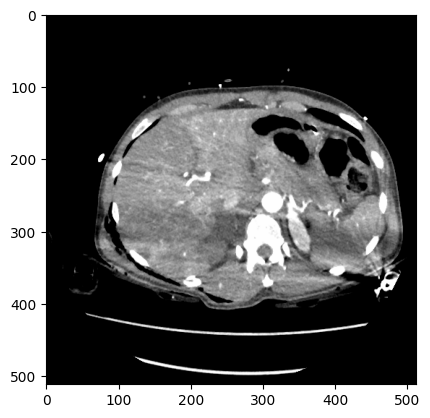

In [110]:
png_path = '../../data/png_folder'
n = 500
p = os.path.join(png_path, f"{png_path}/46904_137_{n}.png")
sample = cv2.imread(p)
plt.imshow(sample)

[0. 1. 2. 3. 5.]


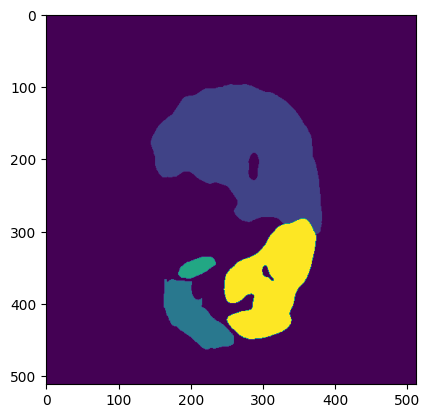

In [111]:
plt.imshow(mask_org[:,:,n])
print(np.unique(mask_org[:,:,n]))

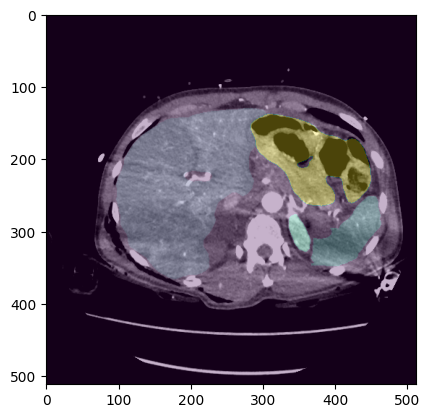

In [115]:
plt.imshow(sample)
# plt.imshow(np.rot90(mask_org[:,:,n], k=1), alpha=0.3)
plt.imshow(mask_org[:,:,n].transpose(1,0)[::-1, :,], alpha=0.3)
# plt.imshow(mask_org[:,:,n], alpha=0.3)

In [89]:
mask_org[:,:,n].shape

(512, 512)